# URI - Problems and Solutions

In [155]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [156]:
data = pd.read_csv('level_solutions.csv', header=None, names=['Level', 'Solutions']).reset_index()
data.head()

,index,Level,Solutions
0,0,1,89804
1,1,1,63659
2,2,1,60080
3,3,1,59711
4,4,1,51529


In [157]:
count = data.groupby(['Level']).agg(['count'])['Solutions']
count

,count
Level,
1,280
2,190
3,187
4,172
5,421
6,106
7,76
8,46
9,14


In [158]:
index = {}

def set_index(level):
    delta = 1.0 / count['count'][level]
    offset = level - 1
    i = index.get(level, 0)
    index[level] = i + 1
    
    return offset + i * delta
    
data['x'] = data['Level'].apply(set_index)
del data['index']
data.head()

,Level,Solutions,x
0,1,89804,0.000000
1,1,63659,0.003571
2,1,60080,0.007143
3,1,59711,0.010714
4,1,51529,0.014286


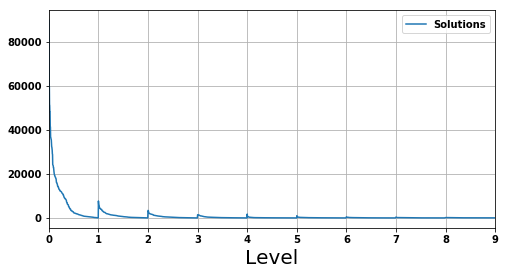

In [159]:
ax = data.plot(
        kind='line',
        x='x',
        y='Solutions',
        figsize=(8,4),
    );

ax.set_xlabel('Level', fontsize=20)
# ax.set_ylabel('Solutions')
# ax.set_title('All levels')
ax.xaxis.grid(True)
ax.yaxis.grid(True)

fig = ax.get_figure()
fig.savefig("all_levels.png")

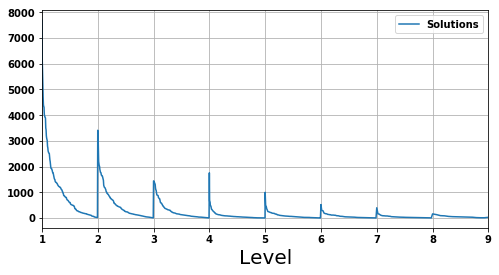

In [160]:
data = data[data.Level > 1]

ax = data.plot(
        kind='line',
        x='x',
        y='Solutions',
        figsize=(8, 4),
    );

ax.set_xlabel('Level', fontsize=20)
# ax.set_ylabel('Solutions', fontsize=18)
ax.set_title('')
ax.xaxis.grid(True)
ax.yaxis.grid(True)

fig = ax.get_figure()
fig.savefig("all_levels_gt_1.png")

In [163]:
data2 = pd.read_csv('level_stddev_avg.csv', header=0)
data2

,level,stddev,avg
0,1,12474,8392
1,2,1308,1087
2,3,621,515
3,4,329,262
4,5,142,84
5,6,126,90
6,7,84,69
7,8,64,45
8,9,44,54
9,10,0,23


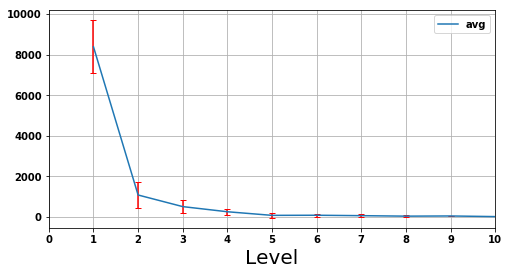

In [162]:
ax2 = data2.plot(
        kind='line',
        x='level',
        y='avg',
        figsize=(8,4),
        xticks=range(0,11),
        xlim=(0,10),
        yerr=data2['stddev'],
        capsize=3,
        ecolor='red'
      )

# ax2.set_title('Average number of correct solutions per level')
ax2.set_xlabel('Level', fontsize=20)
# ax2.set_ylabel('Solutions', fontsize=18)

ax2.xaxis.grid(True)
ax2.yaxis.grid(True)

fig = ax2.get_figure()
fig.savefig("avg_stddev.png")